# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #04</span>

Durante la quarta esercitazione del corso, abbiamo introdotto le basi della meccanica statistica concentrandoci in particolare sull'insieme microcanonico, caratterizzato da numero di particelle, volume ed energia fissati. Lo scopo di ciò, era quello di simulare, tramite metodi Monte Carlo, un problema di **Dinamica Molecolare**, in modo da ricavare alcune grandezze fisiche fondamentali come energia potenziale, cinetica, temperatura e pressione.

Per svolgere questa esercitazione, ci è stato fornito un codice di partenza in grado di simulare lo stato di un sistema microscopico con condizione di periodicità al contorno (**PBC**), e la sua evoluzione nel tempo. Quest'ultima ottenuta applicando l'**Algoritmo di Verlet**. Come abbiamo visto a lezione, si tratta di un algoritmo molto potente capace di garantire la conservazione dell'energia totale del sistema anche dopo un gran numero di step di simulazione. E' importante però ricordare che, per poter studiare in modo deterministico ($i.e.$ risolvendo le equazioni del moto nello spazio delle fasi $(q,p)$) l'evoluzione nel tempo dei nostri gradi di libertà, è necessario come minimo conoscere la forma dell'energia potenziale che descrive le interazioni all'interno del sistema, in modo da poter implementare il calcolo delle forze agenti su ogni particella ($\vec{F} = -\vec{\nabla}V$). Per le nostre simulazioni, ci siamo riferiti ad un particolare tipo di potenziale: il potenziale a due corpi di **Lennard-Jones**, che come sappiamo descrive con ottima precisione i processi d'interazione tra atomi appartenenti alla categoria dei gas nobili. Di seguito è riportata l'espressione generale che descrive l'andamento di un potenziale di $LJ$ in funzione della distanza relativa $r$:

$$V_{LJ} = 4 \epsilon \left[ \left( \frac{\sigma}{r} \right) ^{12} - \left( \frac{\sigma}{r} \right) ^{6} \right]$$

In virtù del breve range di interazione associato a questo potenziale, un'altra approssimazione, che abbiamo preso in considerazione, riguardava l'implementazione di un **raggio di cut-off**, oltre il quale trascuriamo il termine d'interazione. Chiaramente questa quantità dipenderà fortemente dallo stato termodinamico del sistema simulato ($e.g.$ solido, liquido e gassoso).

### <span style="color:darkorange"> Esercizi 04.1 e 04.2</span>

I primi due esercizi prevedevano la modifica del codice fornito, implementando prima di tutto la possibilità di caricare, oltre alla configurazione iniziale, quella subito antecedente. Questo era necessario visto il tipo di algoritmo utilizzato per descrivre l'evoluzione temporale dei gradi di libertà all'interno del sistema. A lezione abbiamo infatti visto che l'algoritmo di Verlet permette di evolvere lo stato di un sistema, stimando la posizione di ogni particella dopo un intervallo temporale infinitesmo $dt$, purchè si conosca non solo la posizione iniziale $\vec{r}(t),$ ma anche quella precedente al tempo $t-dt$, infatti:

$$\vec{r}(t+dt) = 2\vec{r}(t) - \vec{r}(t-dt) + \vec{a}(t)dt^2$$

dove $\vec{a}(t)$ è il vettore accelerazione calcolato dalla seconda legge della dinamica: $\vec{F} = m\vec{a}$.

In seconda battuta, un altro aspetto che abbiamo dovuto affrontare riguardava il problema dell'**equilibrazione** del sistema. Come accade in laboratorio, infatti, una volta che il sistema viene lasciato libero di evolversi, esso raggiungerà, dopo un certo intervallo di tempo, una condizione di equilibrio in corrispondenza della quale tutte le grandezze tenderanno a fluttuare intorno a valori fissati. Analogamente, inizializzando il sistema partendo da una configurazione generica, ci aspettiamo che, per rendere accessibile il calcolo diretto delle varie grandezze fisiche, sia necessario far ripartire la simulazione più volte, partendo sempre dalla configurazione finale precedentemente raggiunta, e scalando volta per volta le velocità di ogni singola particella in modo da avvicinarsi il più possibile alla temperatura desiderata e quindi alla condizione di equilibrio.

Infine ho implementato all'interno del mio codice sia il calcolo della pressione istantanea (vedi sotto), sia il calcolo di valor medio e incertezza statistica, tramite il consueto metodo a blocchi, di tutte le grandezze fisiche considerate all'interno della simulazione:

- Energia Potenziale per particella $U/N_{part}$;
- Energia Cinetica per particella $K/N_{part}$;
- Energia Totale per particella $E_{tot}/N_{part}$;
- Temperatura $T$;
- Pressione $P$.

Quest'ultima è stata calcolata mediante la seguente formula:

$$ P = \rho k_B T + \frac{1}{3V} W $$

dove il viriale $W$ viene definito come

$$W = \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle$$

 

### <span style="color:darkorange"> Esercizio 04.3</span>

Una volta ultimato il codice descritto sopra, è stata eseguita una simulazione di dinamica molecolare per i tre stati della materia dell'**Argon** ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) sotto le seguenti condizioni:

1. fase solida: $\rho = 1.1$, $T = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho = 0.8$, $T = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho = 0.05$, $T = 1.2$ (raggio di cut-off: $r_c = 5.0$)

<font color="blue">**N.B.**</font> le grandezze riportate sopra sono scritte in unità di Lennard-Jones.

Ognuna di queste simulazioni consisteva innanzitutto nel raggiungimento della condizione d'equilibrio, partendo da una configurazione ordinata comune: reticolo cristallino fcc. Una volta raggiunto l'equilibrio si sono raccolti campioni di $M=10^6$ dati per ognuna delle grandezze fisiche prese in considerazione: energia potenziale $U$, cinetica $K$, totale $E$, teperatura $T$ e pressione $P$. Da questo set di misure ho quindi potuto stimare valori medi accompagnati dalle relative incertezze statistiche, applicando il consueto metodo a blocchi con $N_{blk} = 100$.

Per quanto riguarda lo **stato solido**, il sistema è stato inizializzato partendo da una configurazione cristallina fcc prefetta. La fase di equilibrazione è stata suddivisa in blocchi da $2 \cdot 10^3$ step. Nello specchieto di Python sottostante è riportato l'andamento della temperatura istantanea durante la fase di equilibrazione e in condizione di equilibrio. 

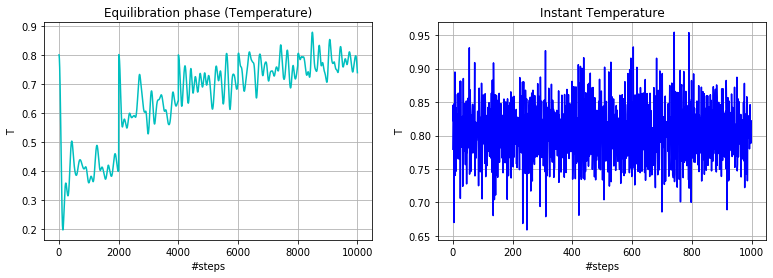

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T_eq = np.loadtxt("Solid/equil_temp.out", usecols=(0), delimiter=' ', unpack='true')
T_ist = np.loadtxt("Solid/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')

nsteps = 10000
n = np.arange(nsteps)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, T_eq,color='c')
plt.title('Equilibration phase (Temperature)')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

N = 1000
n = np.arange(N)
plt.subplot(132)
plt.plot(n, T_ist,color='b')
plt.title('Instant Temperature')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

plt.show()

Come si osserva dal primo plot, durante i primi step della fase di equilibrazione, la temperatura istantanea crolla fino a raggiungere il valore $T=0.2$. Ciò è dovuto fodamentalmente alla configurazione inizale scelta per il sistema: reticolo cristallino fcc. Partendo infatti da una disposizione perfettamente ordinata delle particelle, mi aspetto che il valore istantaneo dell'energia potenziale sia di base molto basso. Dato che, una volta partita la simulazione, il sistema comincia a disordinarsi molto velocemente, si osserva un innalzamento dell'energia potenziale e, per la conservazione dell'energia, una diminuzione dell'energia cinetica, e quindi della temperatura dato che 

$$T = \frac{2}{3} \frac{1}{k_B} \left \langle \frac{K}{N_{part}} \right \rangle$$

Il sistema raggiunge una condizione d'equilibrio dopo $10^4$ step, in seguito ai quali la temperatura comicia a fluttuare intorno al valore atteso $T=0.8$ come si può notare dal secondo grafico.

Di seguito sono anche riportati i valori istantanei, in condizione di equilibrio, di: energia cinetica, energia potenziale, energia totale e pressione. Per diminuire la correlazione tra i dati, ho misurato le varie grandezze ogni $100$ step di simulazione (una trattazione più formale e precisa riguardo l'autocorrelazione delle misure verrà condotta all'interno della settima esercitazione).

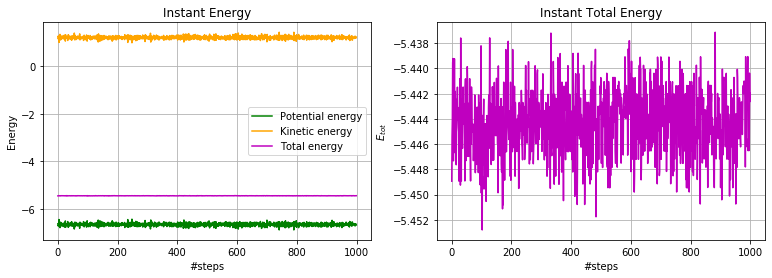

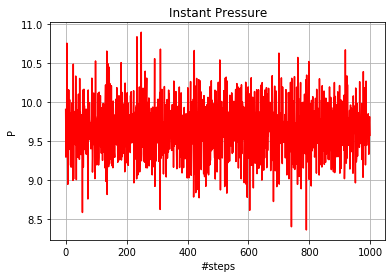

In [3]:
U = np.loadtxt("Solid/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
K = np.loadtxt("Solid/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
Etot = np.loadtxt("Solid/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
P = np.loadtxt("Solid/output_pres.dat", usecols=(0), delimiter=' ', unpack='true')

N = 1000
n = np.arange(N)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, U,color='g',label='Potential energy')
plt.title('Instant Energy')
plt.xlabel('#steps')
plt.ylabel('Energy')
plt.grid(True)
plt.plot(n, K,color='orange',label='Kinetic energy')
plt.plot(n, Etot,color='m',label='Total energy')
plt.legend()

plt.subplot(132)
plt.plot(n, Etot,color='m')
plt.title('Instant Total Energy')
plt.xlabel('#steps')
plt.ylabel('$E_{tot}$')
plt.grid(True)

plt.figure()
plt.plot(n, P,color='r')
plt.title('Instant Pressure')
plt.xlabel('#steps')
plt.ylabel('P')
plt.grid(True)

plt.show()

Comparando i primi due grafici, possiamo effettivamente osservare come, benchè energia potenziale $U$ e energia cinetica $K$ oscillino intorno al loro valore medio, l'energia totale, $E=U+K$, fluttua su scale di grandezze molto più piccole durante tutto il corso della simulazione. Ciò è dovuto al fatto che stiamo simulando l'insieme microcanonico (energia totale fissata), utilizzando un algoritmo molto efficiente (ma non perfetto ovviamente) per quanto concerne la conservazione di energia su scale temporali estese.

A questo punto, ho applicato il metodo a blocchi per calcolare valori medi ed incertezze statistiche delle varie grandezze fisiche, in unità del Sistema Internazionale. Di seguito è riportato il loro andamento in funzione del numero di blocchi.

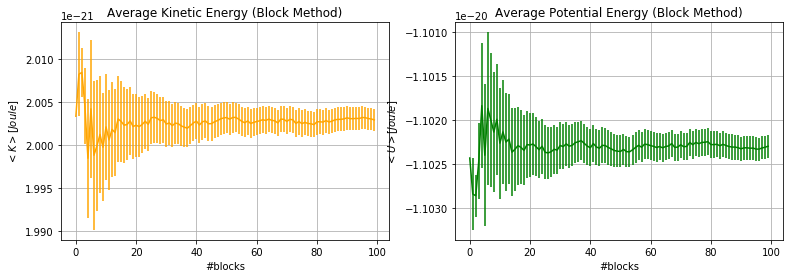

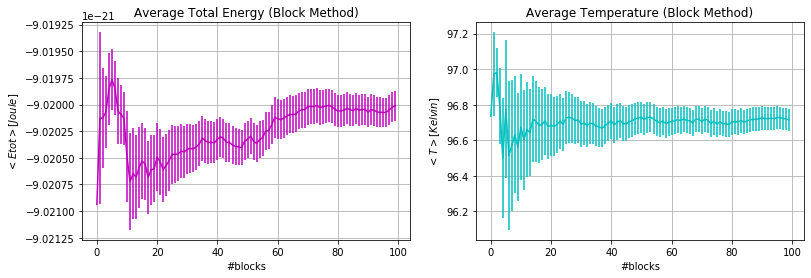

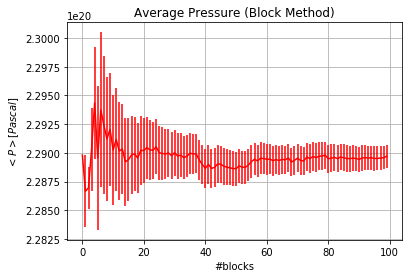

In [4]:
ave_T, err_T = np.loadtxt("Solid/ave_temp.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_U, err_U = np.loadtxt("Solid/ave_epot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_K, err_K = np.loadtxt("Solid/ave_ekin.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_Etot, err_Etot = np.loadtxt("Solid/ave_etot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Solid/ave_pres.out", usecols=(2,3), delimiter=' ', unpack='true')

#parametri Argon
sigma = 0.34
e_kb = 120
kb = 1.380649*(10**-23)

#fattori di scala in SI
Tscale = e_kb
Escale = e_kb*kb
Pscale = (sigma**3)/(e_kb*kb)

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_K*Escale,err_K*Escale,color='orange')
plt.title('Average Kinetic Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<K> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_Etot*Escale,err_Etot*Escale,color='m')
plt.title('Average Total Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<Etot> [Joule]$')
plt.grid(True)


plt.subplot(132)
plt.errorbar(n,ave_T*Tscale,err_T*Tscale,color='c')
plt.title('Average Temperature (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<T> [Kelvin]$')
plt.grid(True)

plt.figure()
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

Osserviamo come l'energia totale fluttui intorno a un valore medio negativo, in accordo col fatto che stiamo simulando un sistema legato (fase solida), per il quale il termine d'interazione potenziale gioca un ruolo fondamentale nel favorire configurazioni d'equilibrio in cui le particelle oscillano intorno a posizioni fissate nello spazio.

Anche per la simulazione della fase liquida, il sistema è stato inizializzato partendo da una configurazione cristallina fcc, e la fase di equilibrazione è stata suddivisa in blocchi da $2 \cdot 10^3$ step. Il pannello sottostante riporta l'andamento della temperatura istantanea durante la fase di equilibrazione e in condizione d'equilibrio.

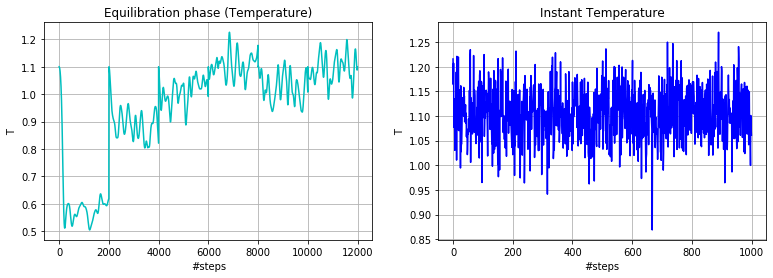

In [5]:
T_eq = np.loadtxt("Liquid/equil_temp.out", usecols=(0), delimiter=' ', unpack='true')
T_ist = np.loadtxt("Liquid/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')

nsteps = 12000
n = np.arange(nsteps)
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, T_eq,color='c')
plt.title('Equilibration phase (Temperature)')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

N = 1000
n = np.arange(N)
plt.subplot(132)
plt.plot(n, T_ist,color='b')
plt.title('Instant Temperature')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

plt.show()

Osserviamo come, anche per la fase liquida, la temperatura subisca un crollo durante i primi step di simulazione, arrivando a toccare valori di circa $T=0.5$. La giustificazione di questo andamento è analoga a quella vista per la fase solida, ovvero ci aspettiamo che, partendo da una configurazione perfettamente ordinata, il sistema tenda a disordinarsi molto velocemente durante le prime fasi della simulazione provocando una diminuzione di energia cinetica e quindi di temperatura.

Raggiunta la condizione d'equilibrio, ho misurato anche i valori istantanei di energia (potenziale, cinetica e totale) e pressione, in funzione del numero di step. I risultati sono riportati di seguito.

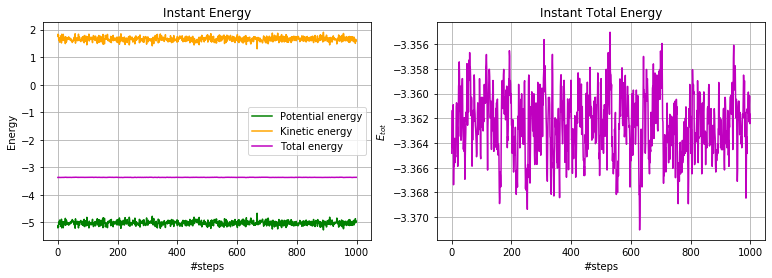

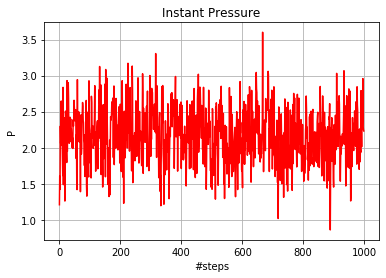

In [6]:
U = np.loadtxt("Liquid/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
K = np.loadtxt("Liquid/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
Etot = np.loadtxt("Liquid/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
P = np.loadtxt("Liquid/output_pres.dat", usecols=(0), delimiter=' ', unpack='true')

N = 1000
n = np.arange(N)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, U,color='g',label='Potential energy')
plt.title('Instant Energy')
plt.xlabel('#steps')
plt.ylabel('Energy')
plt.grid(True)
plt.plot(n, K,color='orange',label='Kinetic energy')
plt.plot(n, Etot,color='m',label='Total energy')
plt.legend()

plt.subplot(132)
plt.plot(n, Etot,color='m')
plt.title('Instant Total Energy')
plt.xlabel('#steps')
plt.ylabel('$E_{tot}$')
plt.grid(True)

plt.figure()
plt.plot(n, P,color='r')
plt.title('Instant Pressure')
plt.xlabel('#steps')
plt.ylabel('P')
plt.grid(True)

plt.show()

Nuovamente, vediamo come l'energia totale fluttui su scale di grandezza molto più piccole rispetto all'energia potenziale e cinetica, in accordo con la conservazione dell'energia garantita dall'applicazione dell'algoritmo di Verlet.

A questo punto ho utilizzato il metodo a blocchi per ricavare valori medi ed incertezze statistiche.

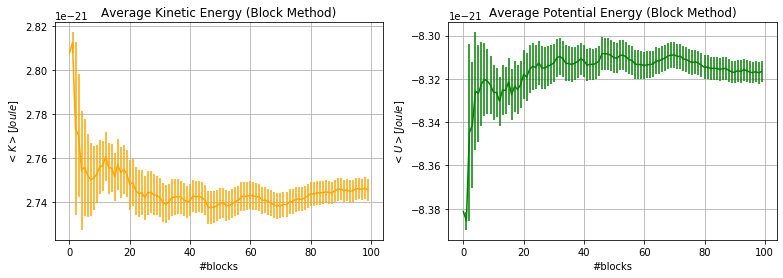

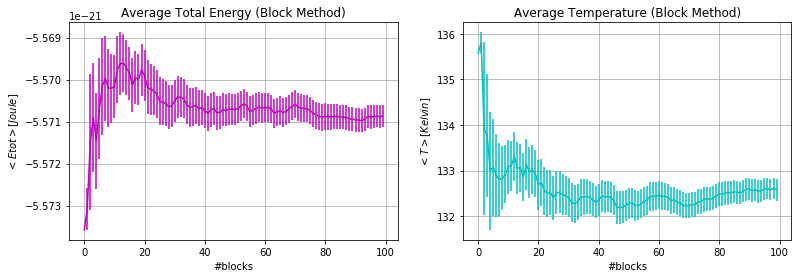

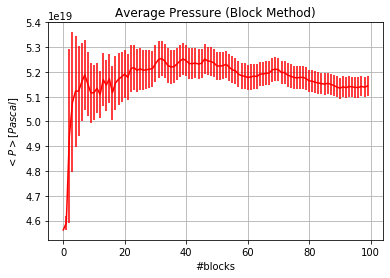

In [7]:
ave_T, err_T = np.loadtxt("Liquid/ave_temp.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_U, err_U = np.loadtxt("Liquid/ave_epot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_K, err_K = np.loadtxt("Liquid/ave_ekin.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_Etot, err_Etot = np.loadtxt("Liquid/ave_etot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Liquid/ave_pres.out", usecols=(2,3), delimiter=' ', unpack='true')

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_K*Escale,err_K*Escale,color='orange')
plt.title('Average Kinetic Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<K> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_Etot*Escale,err_Etot*Escale,color='m')
plt.title('Average Total Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<Etot> [Joule]$')
plt.grid(True)


plt.subplot(132)
plt.errorbar(n,ave_T*Tscale,err_T*Tscale,color='c')
plt.title('Average Temperature (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<T> [Kelvin]$')
plt.grid(True)

plt.figure()
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

Anche in questo caso, osserviamo come l'energia totale assuma valori negativi, in accordo col fatto che stiamo simulando un sistema legato. Notiamo inoltre come il valore di pressione tenda ad essere più piccolo rispetto a quello ottenuto per la simulazione precedente. Ciò è dovuto sostanzialmente al fatto che il sistema nella fase liquida tende ad essere meno compatto e denso che nella fase solida, di conseguenza le particelle tenderanno ad interagire meno tra loro e quindi si misurano valori istantanei del viriale $W$ inferiori.

Infine, ho simulato il mio sistema sotto le condizioni termodinamiche associate alla fase gassosa. Questa volta, per la fase di equilibrazione, ho fissato un numero di step per ogni blocco di simulazione pari a $5 \cdot 10^3$.

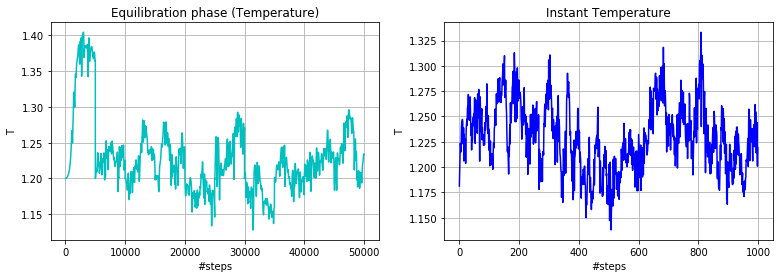

In [8]:
T_eq = np.loadtxt("Gas/equil_temp.out", usecols=(0), delimiter=' ', unpack='true')
T_ist = np.loadtxt("Gas/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')

nsteps = 50000
n = np.arange(nsteps)
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, T_eq,color='c')
plt.title('Equilibration phase (Temperature)')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

N = 1000
n = np.arange(N)
plt.subplot(132)
plt.plot(n, T_ist,color='b')
plt.title('Instant Temperature')
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)

plt.show()

La condizione d'equilibrio viene raggiunta dopo un numero di step di simulazione pari a $5 \cdot 10^4$, dopo i quali la temperatura istantanea comincia a fluttuare intorno al valore desiderato $T=1.2$. Osserviamo inoltre dal plot di sinistra come, contrariamente ai due casi precedenti, la temperatura del sistema aumenti durante i primi step della fase di equilibrazione. Questa differenza sostanziale è dovuta al fatto che, nonostante la configurazione iniziale sia perfettamente ordinata, la maggior parte delle coppie di particelle presenti all'interno del sistema non si posiziona in prossimità del minimo del potenziale d'interazione (come accade invece per la fase solida e liquida in quanto stati legati), bensì andrà ad occupare la regione debolmente attrattiva del potenziale situata a grandi distanze. Ciò fa sì che, nelle prime fasi della simulazione, il sistema senta una forza di richiamo interna che porta i gradi di libertà ad avvicinarsi, provocando un abbassamento dell'energia potenziale e, di conseguenza, per la conservazione dell'energia, un aumento della componente cinetica e della temperatura, in accordo con quanto osservato dal grafico.

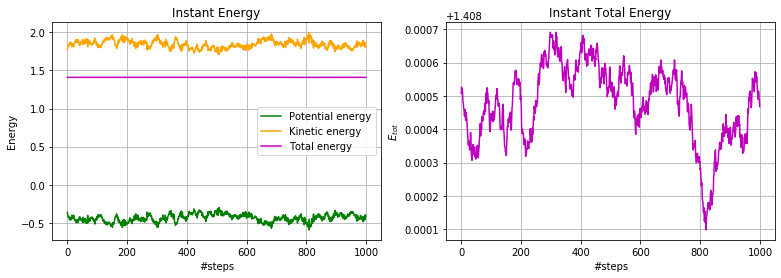

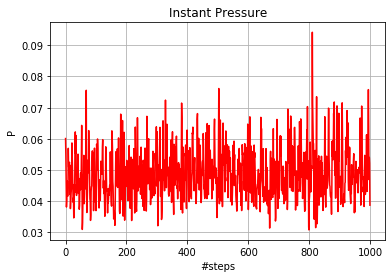

In [9]:
U = np.loadtxt("Gas/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
K = np.loadtxt("Gas/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
Etot = np.loadtxt("Gas/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
P = np.loadtxt("Gas/output_pres.dat", usecols=(0), delimiter=' ', unpack='true')

N = 1000
n = np.arange(N)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n, U,color='g',label='Potential energy')
plt.title('Instant Energy')
plt.xlabel('#steps')
plt.ylabel('Energy')
plt.grid(True)
plt.plot(n, K,color='orange',label='Kinetic energy')
plt.plot(n, Etot,color='m',label='Total energy')
plt.legend()

plt.subplot(132)
plt.plot(n, Etot,color='m')
plt.title('Instant Total Energy')
plt.xlabel('#steps')
plt.ylabel('$E_{tot}$')
plt.grid(True)

plt.figure()
plt.plot(n, P,color='r')
plt.title('Instant Pressure')
plt.xlabel('#steps')
plt.ylabel('P')
plt.grid(True)

plt.show()

Nuovamente, le fluttuazioni dell'energia totale appaiono trascurabili rispetto a quelle di energia potenziale e cinetica.

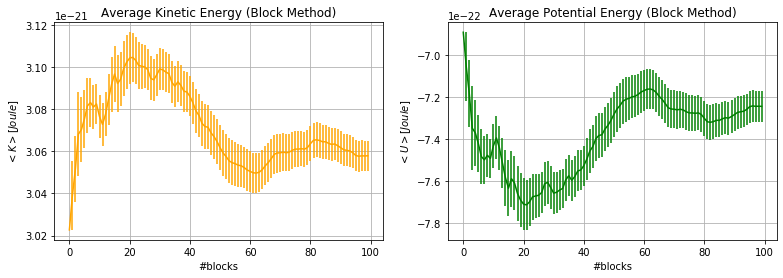

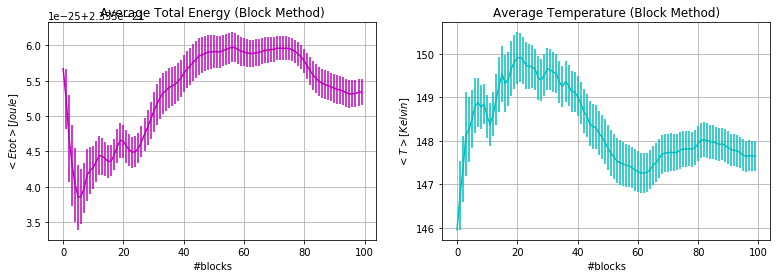

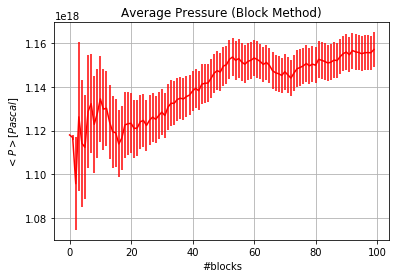

In [10]:
ave_T, err_T = np.loadtxt("Gas/ave_temp.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_U, err_U = np.loadtxt("Gas/ave_epot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_K, err_K = np.loadtxt("Gas/ave_ekin.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_Etot, err_Etot = np.loadtxt("Gas/ave_etot.out", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Gas/ave_pres.out", usecols=(2,3), delimiter=' ', unpack='true')

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_K*Escale,err_K*Escale,color='orange')
plt.title('Average Kinetic Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<K> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_Etot*Escale,err_Etot*Escale,color='m')
plt.title('Average Total Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<Etot> [Joule]$')
plt.grid(True)


plt.subplot(132)
plt.errorbar(n,ave_T*Tscale,err_T*Tscale,color='c')
plt.title('Average Temperature (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<T> [Kelvin]$')
plt.grid(True)

plt.figure()
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

Vediamo inoltre come la pressione ottenuta per la fase gassosa sia la più piccola tra tutte quelle misurate finora, in accordo col fatto che, in un gas, le particelle tendano a trovarsi lontane le une dalle altre e di conseguenza interagiranno solo debolmente.